# PROCESSAMENTO DOS DADOS DOS SENSOR NO MODO SEM PLANTA

Data de início: 16/02/2022
Data de término: 21/02/2022

## Bibliotecas importantes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Importação dos dados

In [2]:
base = pd.read_csv('/content/semPlanta16022022 - semPlanta16022022.csv')

In [3]:
base

,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
0,2023-2-16 00:41:59,400,65.2,1009.36,15362,17274,13319,0,27.70,2600,23600
1,2023-2-16 01:04:44,400,83.4,1009.60,42157,18410,13851,0,27.99,2631,0
2,2023-2-16 01:09:52,464,64.8,1009.54,214581,20380,14039,0,32.47,2758,0
3,2023-2-16 01:14:59,520,63.8,1009.41,255357,20283,13969,56,33.03,2874,0
4,2023-2-16 01:20:06,479,63.9,1009.38,295010,20379,13990,144,32.86,2890,0
...,...,...,...,...,...,...,...,...,...,...,...
1602,2023-2-21 16:59:41,403,53.8,1011.55,298203,21031,14393,215,34.15,2995,300
1603,2023-2-21 17:04:43,461,54.2,1011.63,193029,20865,14348,382,34.23,3153,300
1604,2023-2-21 17:09:47,471,53.8,1011.63,160885,20502,14341,1000,34.39,3160,300
1605,2023-2-21 17:14:53,471,56.0,1011.74,177910,20791,14344,467,33.84,3157,200


## Informações básicas do dataset

In [ ]:
print("shape: ", base.shape)
print("index: ", base.index)
print("columns: ", base.columns)
print("count: ", base.count)

shape:  (1607, 11)
index:  RangeIndex(start=0, stop=1607, step=1)
columns:  Index(['_key', 'co2SGP', 'humBME', 'pressBME', 'resBME', 'sgpEthanol', 'sgpH2',
       'sgpTVOC', 'tempBME', 'tempSHT31', 'tlsLUX'],
      dtype='object')
count:  <bound method DataFrame.count of                     _key  co2SGP  humBME  pressBME  resBME  sgpEthanol  sgpH2  \
0     2023-2-16 00:41:59     400    65.2   1009.36   15362       17274  13319   
1     2023-2-16 01:04:44     400    83.4   1009.60   42157       18410  13851   
2     2023-2-16 01:09:52     464    64.8   1009.54  214581       20380  14039   
3     2023-2-16 01:14:59     520    63.8   1009.41  255357       20283  13969   
4     2023-2-16 01:20:06     479    63.9   1009.38  295010       20379  13990   
...                  ...     ...     ...       ...     ...         ...    ...   
1602  2023-2-21 16:59:41     403    53.8   1011.55  298203       21031  14393   
1603  2023-2-21 17:04:43     461    54.2   1011.63  193029       20865  14348   

## Análise estatística preliminar

In [ ]:
base.describe()

,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
count,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000,1607.000000
mean,451.194773,57.473429,1011.184088,197944.372744,20868.505912,14317.214686,325.260112,33.908500,3059.919726,947.790915
std,74.330377,2.886320,1.370550,44751.304726,235.790023,84.226459,1116.251618,0.634042,95.063408,1567.431936
min,400.000000,51.700000,1008.140000,15362.000000,17274.000000,13319.000000,0.000000,27.700000,2600.000000,0.000000
25%,409.000000,55.400000,1010.275000,174403.000000,20778.000000,14295.000000,163.000000,33.520000,3014.000000,0.000000
50%,438.000000,57.200000,1011.190000,190911.000000,20899.000000,14339.000000,227.000000,33.970000,3075.000000,200.000000
75%,469.500000,59.000000,1012.190000,215280.000000,20994.000000,14368.000000,324.000000,34.360000,3126.000000,1600.000000
max,2037.000000,83.400000,1013.850000,452409.000000,21423.000000,14459.000000,33369.000000,35.400000,3234.000000,23600.000000


### Identificando os menores valores

In [ ]:
print("Menores valores de co2SGP")
base.loc[base['co2SGP'] <= 400.000000]

Menores valores de co2SGP


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
0,2023-2-16 00:41:59,400,65.2,1009.36,15362,17274,13319,0,27.70,2600,23600
1,2023-2-16 01:04:44,400,83.4,1009.60,42157,18410,13851,0,27.99,2631,0
5,2023-2-16 01:25:13,400,61.9,1009.30,333390,20600,14036,18,33.47,2849,0
7,2023-2-16 01:35:27,400,62.1,1009.18,394960,20550,14016,41,33.67,2914,0
8,2023-2-16 01:40:34,400,63.0,1009.11,422533,20737,14082,0,33.38,2857,0
...,...,...,...,...,...,...,...,...,...,...,...
1469,2023-2-21 05:38:04,400,55.5,1011.77,271284,21102,14407,162,33.45,2911,0
1487,2023-2-21 07:09:19,400,58.1,1013.21,280016,21102,14412,160,32.89,2904,700
1527,2023-2-21 10:32:33,400,55.1,1013.30,234524,20974,14404,246,33.76,3102,1100
1533,2023-2-21 11:02:59,400,55.0,1013.22,299283,21222,14401,92,34.05,3024,1100


In [ ]:
print("Menores valores de humBME")
base.loc[base['humBME'] <= 51.700000]

Menores valores de humBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
723,2023-2-18 14:29:07,411,51.7,1010.41,219862,21062,14389,166,35.31,3111,2200


In [ ]:
print("Menores valores de pressBME")
base.loc[base['pressBME'] <= 1008.140000]

Menores valores de pressBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
162,2023-2-16 14:50:12,439,58.8,1008.14,179812,20668,14232,254,34.48,3200,2800


In [ ]:
print("Menores valores de resBME")
base.loc[base['resBME'] <= 15362.000000]

Menores valores de resBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
0,2023-2-16 00:41:59,400,65.2,1009.36,15362,17274,13319,0,27.7,2600,23600


In [ ]:
print("Menores valores de sgpEthanol")
base.loc[base['sgpEthanol'] <= 	17274.000000]

Menores valores de sgpEthanol


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
0,2023-2-16 00:41:59,400,65.2,1009.36,15362,17274,13319,0,27.7,2600,23600


In [ ]:
print("Menores valores de sgpH2")
base.loc[base['sgpH2'] <= 13319.000000]

Menores valores de sgpH2


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
0,2023-2-16 00:41:59,400,65.2,1009.36,15362,17274,13319,0,27.7,2600,23600


In [ ]:
print("Menores valores de sgpTVOC")
base.loc[base['sgpTVOC'] <= 0.000000]

Menores valores de sgpTVOC


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
0,2023-2-16 00:41:59,400,65.2,1009.36,15362,17274,13319,0,27.70,2600,23600
1,2023-2-16 01:04:44,400,83.4,1009.60,42157,18410,13851,0,27.99,2631,0
2,2023-2-16 01:09:52,464,64.8,1009.54,214581,20380,14039,0,32.47,2758,0
8,2023-2-16 01:40:34,400,63.0,1009.11,422533,20737,14082,0,33.38,2857,0
19,2023-2-16 02:36:56,400,62.3,1008.86,421473,20861,14129,0,33.02,2876,0
252,2023-2-16 22:30:24,400,59.9,1010.78,203862,21155,14338,0,33.60,3034,0
359,2023-2-17 07:36:30,456,61.7,1011.08,180005,21183,14309,0,33.12,3031,1500
362,2023-2-17 07:51:46,428,62.0,1011.10,200645,21255,14327,0,33.10,3084,1500
385,2023-2-17 09:49:07,400,57.8,1011.31,187767,21151,14373,0,34.05,3013,2000
629,2023-2-18 06:30:26,442,59.2,1011.60,229796,21350,14371,0,32.44,2832,600


In [ ]:
print("Menores valores de tempBME")
base.loc[base['tempBME'] <= 27.700000]

Menores valores de tempBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
0,2023-2-16 00:41:59,400,65.2,1009.36,15362,17274,13319,0,27.7,2600,23600


In [ ]:
print("Menores valores de tempSHT31")
base.loc[base['tempSHT31'] <= 2600.000000]

Menores valores de tempSHT31


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
0,2023-2-16 00:41:59,400,65.2,1009.36,15362,17274,13319,0,27.7,2600,23600


In [ ]:
print("Menores valores de tlsLUX")
base.loc[base['tlsLUX'] <= 0.000000]

Menores valores de tlsLUX


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
1,2023-2-16 01:04:44,400,83.4,1009.60,42157,18410,13851,0,27.99,2631,0
2,2023-2-16 01:09:52,464,64.8,1009.54,214581,20380,14039,0,32.47,2758,0
3,2023-2-16 01:14:59,520,63.8,1009.41,255357,20283,13969,56,33.03,2874,0
4,2023-2-16 01:20:06,479,63.9,1009.38,295010,20379,13990,144,32.86,2890,0
5,2023-2-16 01:25:13,400,61.9,1009.30,333390,20600,14036,18,33.47,2849,0
...,...,...,...,...,...,...,...,...,...,...,...
1463,2023-2-21 05:07:37,415,54.5,1011.61,251090,21028,14397,215,33.87,2949,0
1464,2023-2-21 05:12:40,400,55.9,1011.59,319533,21172,14423,126,33.41,2878,0
1465,2023-2-21 05:17:49,444,57.1,1011.53,195889,20977,14375,245,33.27,3017,0
1467,2023-2-21 05:27:55,423,54.7,1011.61,265830,21068,14394,194,33.92,2938,0


### Identificando as linhas com os maiores valores

In [ ]:
print("Maiores valores de co2SGP")
base.loc[base['co2SGP'] >= 2037.000000]

Maiores valores de co2SGP


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
1209,2023-2-20 07:38:50,2037,60.6,1012.73,120347,19014,13606,23714,33.55,3034,700


In [ ]:
print("Maiores valores de humBME")
base.loc[base['humBME'] >= 83.400000]

Maiores valores de humBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
1,2023-2-16 01:04:44,400,83.4,1009.6,42157,18410,13851,0,27.99,2631,0


In [ ]:
print("Maiores valores de pressBME")
base.loc[base['pressBME'] >= 1013.850000]

Maiores valores de pressBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
1504,2023-2-21 08:35:35,502,57.4,1013.85,146578,20894,14320,346,33.5,3081,900


In [ ]:
print("Maiores valores de resBME")
base.loc[base['resBME'] >= 452409.000000]

Maiores valores de resBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
11,2023-2-16 01:55:56,400,64.6,1009.0,452409,20599,14035,52,32.81,2973,0


In [ ]:
print("Maiores valores de sgpEthanol")
base.loc[base['sgpEthanol'] >= 21423.000000]

Maiores valores de sgpEthanol


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
675,2023-2-18 10:25:09,417,55.0,1012.03,177534,21423,14380,0,34.17,3103,1800


In [ ]:
print("Maiores valores de sgpH2")
base.loc[base['sgpH2'] >= 14459.000000]

Maiores valores de sgpH2


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
1315,2023-2-20 16:36:49,400,55.3,1011.6,274893,21337,14459,0,33.63,2944,600


In [ ]:
print("Maiores valores de sgpTVOC")
base.loc[base['sgpTVOC'] >= 33369.000000]

Maiores valores de sgpTVOC


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
672,2023-2-18 10:09:47,819,54.8,1012.15,47009,18814,14067,33369,34.16,3143,1200


In [ ]:
print("Maiores valores de tempBME")
base.loc[base['tempBME'] >= 35.400000]

Maiores valores de tempBME


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
1008,2023-2-19 14:38:39,422,55.6,1010.76,211154,21141,14358,117,35.4,3075,3100
1034,2023-2-19 16:50:43,461,55.1,1011.04,199314,20747,14330,473,35.4,3140,700


In [ ]:
print("Maiores valores de tempSHT31")
base.loc[base['tempSHT31'] >= 3234.000000]

Maiores valores de tempSHT31


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
428,2023-2-17 13:28:04,443,57.2,1009.41,177910,20902,14332,172,34.37,3234,4000
438,2023-2-17 14:18:58,407,55.9,1008.95,191243,20962,14359,139,34.39,3234,3700


In [ ]:
print("Maiores valores de tlsLUX")
base.loc[base['tlsLUX'] >= 23600.000000]

Maiores valores de tlsLUX


,_key,co2SGP,humBME,pressBME,resBME,sgpEthanol,sgpH2,sgpTVOC,tempBME,tempSHT31,tlsLUX
0,2023-2-16 00:41:59,400,65.2,1009.36,15362,17274,13319,0,27.7,2600,23600


## Verificando se há valores nulos na base de dados

In [ ]:
base.isnull().sum()

_key          0
co2SGP        0
humBME        0
pressBME      0
resBME        0
sgpEthanol    0
sgpH2         0
sgpTVOC       0
tempBME       0
tempSHT31     0
tlsLUX        0
dtype: int64

## Normalizando os dados

In [ ]:
from sklearn import preprocessing

In [ ]:
baseNormalizada = base.drop(columns=['_key'])
baseNormalizadaArray = preprocessing.normalize(baseNormalizada)
print(baseNormalizadaArray)

[[1.11948602e-02 1.82476221e-03 2.82491102e-02 ... 7.75244067e-04
  7.27665911e-02 6.60496750e-01]
 [8.31153666e-03 1.73295539e-03 2.09783185e-02 ... 5.81599778e-04
  5.46691324e-02 0.00000000e+00]
 [2.14791131e-03 2.99966924e-04 4.67328099e-03 ... 1.50307500e-04
  1.27671107e-02 0.00000000e+00]
 ...
 [2.89211314e-03 3.30351777e-04 6.21178009e-03 ... 2.11167242e-04
  1.94035616e-02 1.84211028e-03]
 [2.62065493e-03 3.11585300e-04 5.62934485e-03 ... 1.88286546e-04
  1.75656213e-02 1.11280464e-03]
 [1.63762654e-03 2.27062433e-04 4.13225042e-03 ... 1.38442743e-04
  1.23169119e-02 4.08385671e-04]]


## Convertendo os dados data/Hora para dia/noite

In [ ]:
#TODO...Realizar a conversão dos dados em dia-noite#

# TSL 2561 [LUX]

## Visualização dos dados de Lux ao longo do tempo

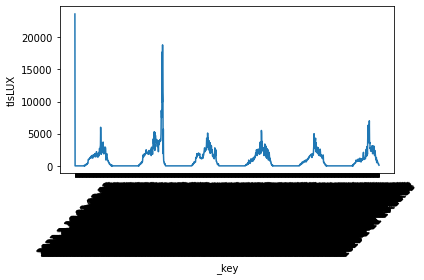

In [ ]:
line = sns.lineplot(x='_key',
                    y='tlsLUX',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

# BME 680

## Verificando a relação da Temperatura BME680, Humidade e Pressão no valor da resistencia do BME 680

In [ ]:
grafico = px.scatter_matrix(base, dimensions=[
    'humBME',
    'pressBME',
    'tempBME',
    ], color = 'resBME')
grafico.show()

## Visualização dos dados de resistencia ao longo do tempo

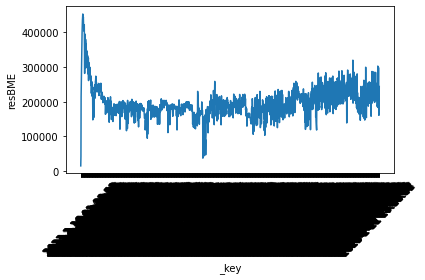

In [ ]:
line = sns.lineplot(x='_key',
                    y='resBME',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Visualizando dados de Pressão no tempo

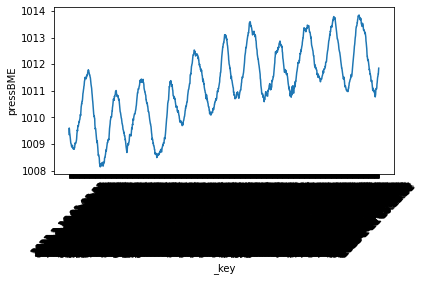

In [ ]:
line = sns.lineplot(x='_key',
                    y='pressBME',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Visualizando dados de Umidade no tempo

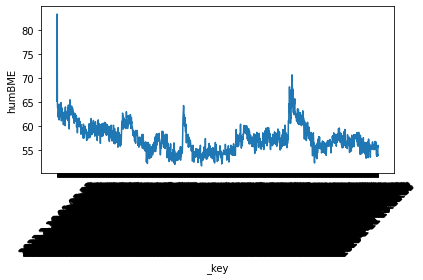

In [ ]:
line = sns.lineplot(x='_key',
                    y='humBME',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da Luz e do tempo na variação da resistencia do BME 680

In [ ]:
grafico = px.scatter_matrix(base, dimensions=[
    '_key',
    'tlsLUX',
    ], color = 'resBME')
grafico.show()

## Verificando a relação que a temperatura tem com a resistencia

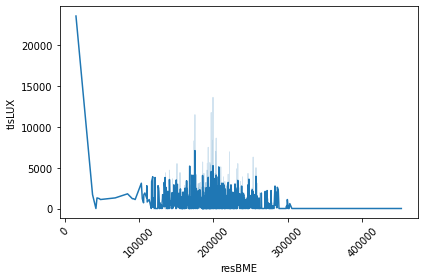

In [ ]:
line = sns.lineplot(x='resBME',
                    y='tlsLUX',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação do CO2 com a resistencia

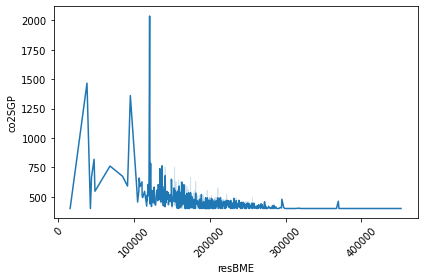

In [ ]:
line = sns.lineplot(x='resBME',
                    y='co2SGP',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da humidade com a resistencia

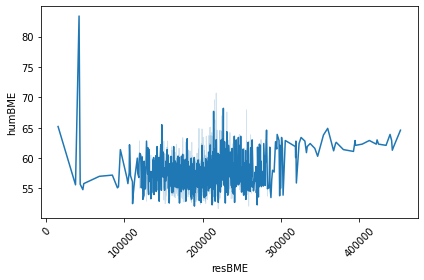

In [ ]:
line = sns.lineplot(x='resBME',
                    y='humBME',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da pressão com a resistencia

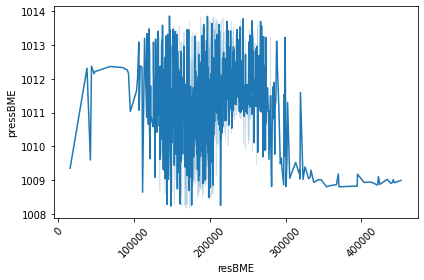

In [ ]:
line = sns.lineplot(x='resBME',
                    y='pressBME',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da concentração de Ethanol com a resistencia

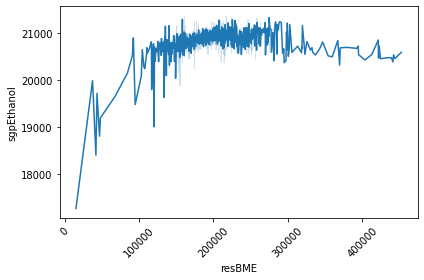

In [ ]:
line = sns.lineplot(x='resBME',
                    y='sgpEthanol',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da concentração de H2 com a resistencia

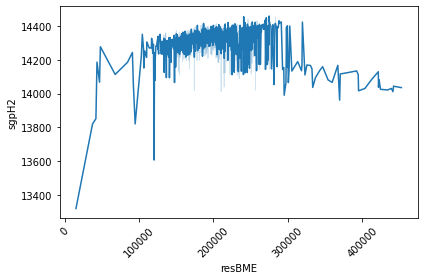

In [ ]:

line = sns.lineplot(x='resBME',
                    y='sgpH2',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da concentração de tVOC com a resistencia

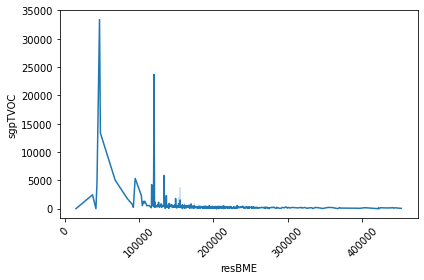

In [ ]:
line = sns.lineplot(x='resBME',
                    y='sgpTVOC',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da temperatura BME 680 com a resistencia

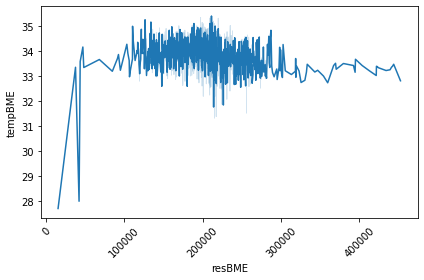

In [ ]:
line = sns.lineplot(x='resBME',
                    y='tempBME',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da temperatura SHT 31 com a resistencia

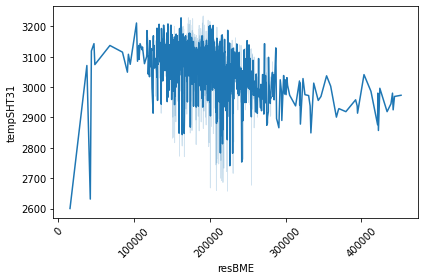

In [ ]:
line = sns.lineplot(x='resBME',
                    y='tempSHT31',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a relação da Lux com a resistencia

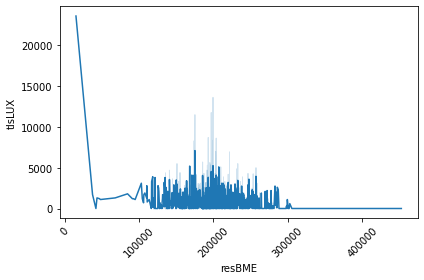

In [ ]:
line = sns.lineplot(x='resBME',
                    y='tlsLUX',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

# SGP30

## Visualização dos dados de ethanol no tempo

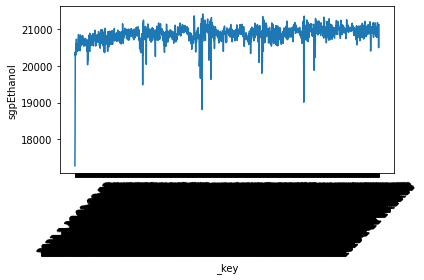

In [ ]:
line = sns.lineplot(x='_key',
                    y='sgpEthanol',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Visualizando dados de H2 no tempo

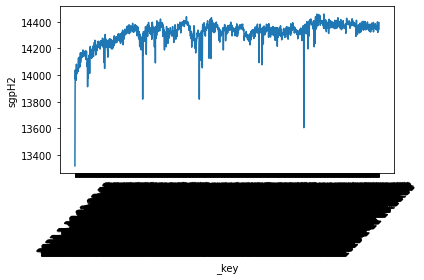

In [ ]:
line = sns.lineplot(x='_key',
                    y='sgpH2',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Visualizando dados de tVOC no tempo

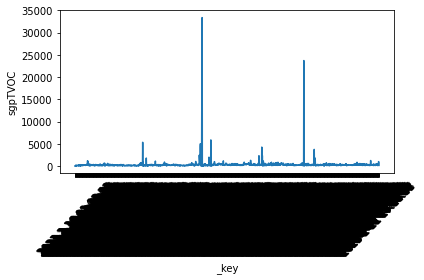

In [ ]:
line = sns.lineplot(x='_key',
                    y='sgpTVOC',
                    data=base)
plt.xticks(rotation=45)
plt.tight_layout()

## Verificando a correlação do CO2, Concentração de Ethanol e Concentração de H2 no valor da concentração de tVOC

In [ ]:
grafico = px.scatter_matrix(base, dimensions=[
    'co2SGP',
    'sgpEthanol',
    'sgpH2',
    ], color = 'sgpTVOC')
grafico.show()